In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Using lemonade.csv dataset and focusing on continuous variables

In [2]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [5]:
df = df.drop("Price", axis=1)

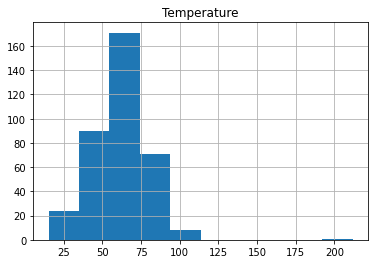

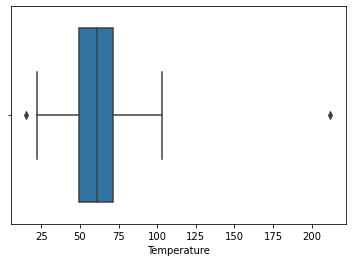

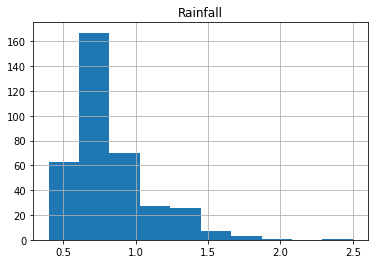

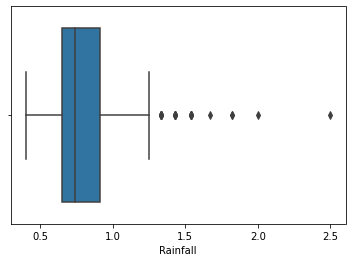

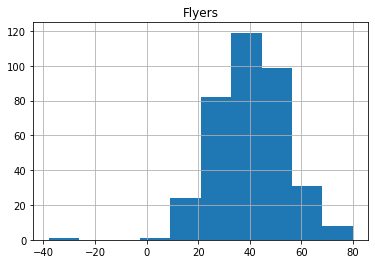

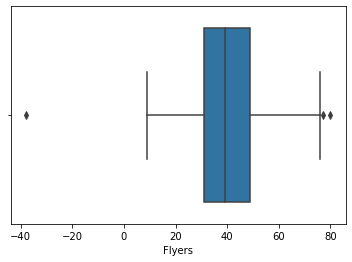

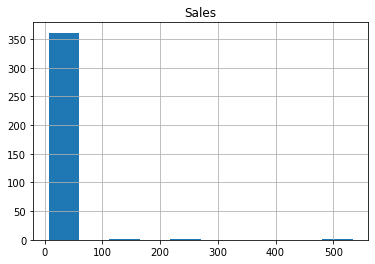

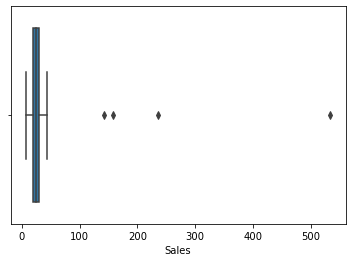

In [6]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col)
        plt.show()


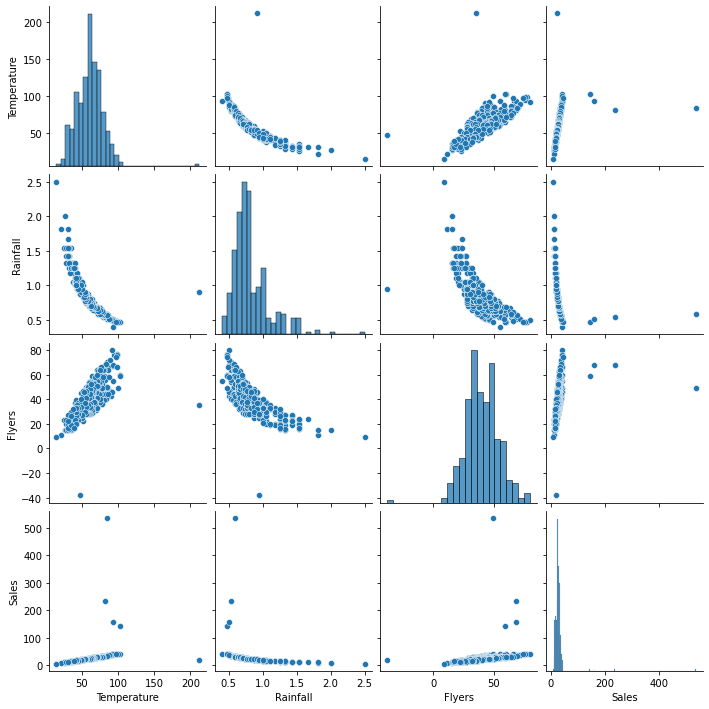

In [7]:
sns.pairplot(df)

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [39]:
def get_lower_and_upper_bounds(df_col, multiplier=1.5):
    '''
    Uses IQR*multiplier formular to determine value for upper and lower
    outliers. Returns lower_bound and upper_bound.
    '''
    # determine first and third quartile of column
    Q1 = df_col.quantile(.25)
    Q3 = df_col.quantile(.75)
    # calculate inner quartile range
    IQR = Q3 - Q1
    
    # calculate bounds for outliers
    lower_bound = Q1 - (IQR * multiplier)
    upper_bound = Q3 + (IQR * multiplier)
    
    return lower_bound, upper_bound

Temperature
lower bound: 27.8
upper_bound: 97.39999999999999 



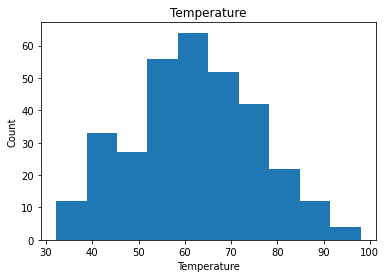

Rainfall
lower bound: 0.32000000000000006
upper_bound: 1.2 



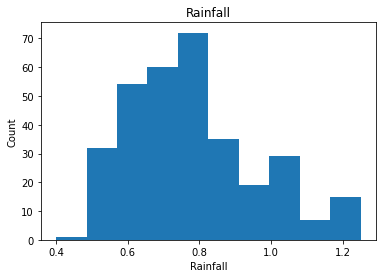

Flyers
lower bound: 9.0
upper_bound: 73.0 



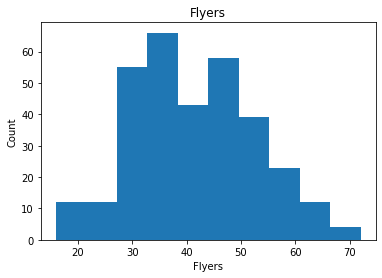

Sales
lower bound: 10.0
upper_bound: 42.0 



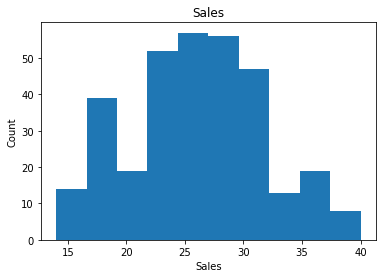

In [42]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [10]:
df.shape

(324, 6)

In [11]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Sales
3,1/4/17,Wednesday,44.1,1.05,28,17
4,1/5/17,Thursday,42.4,1.00,33,18
7,1/8/17,Sunday,37.5,1.18,28,15
8,1/9/17,Monday,38.1,1.18,20,17
9,1/10/17,Tuesday,43.4,1.05,33,18


In [12]:
df

,Date,Day,Temperature,Rainfall,Flyers,Sales
3,1/4/17,Wednesday,44.1,1.05,28,17
4,1/5/17,Thursday,42.4,1.00,33,18
7,1/8/17,Sunday,37.5,1.18,28,15
8,1/9/17,Monday,38.1,1.18,20,17
9,1/10/17,Tuesday,43.4,1.05,33,18
...,...,...,...,...,...,...
357,12/24/17,Sunday,35.8,1.25,26,16
358,12/25/17,Monday,35.5,1.25,19,15
360,12/27/17,Wednesday,42.7,1.00,33,19
361,12/28/17,Thursday,37.8,1.25,32,16


- temp
    - outliers make sense
    - temps over 104 would be typos
    - there do not appear to be any lower outliers
- rain
    - does not make sense to have low outliers as long as it is not less than 0
    - upper outliers should also be kept, it is possible for it to rain more than average and still be accurate data
- flyers
    - flyers should not be negative
    - would only remove lower
- price
    - only one price, can probably remove this column, no outliers
- sales
    - lower outliers do not make sense, upper do with higher multiplier


Temperature
lower bound: 1.7000000000000028
upper_bound: 123.5 



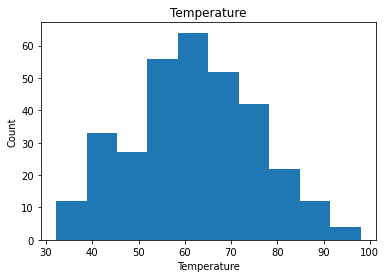

Rainfall
lower bound: -0.009999999999999898
upper_bound: 1.5299999999999998 



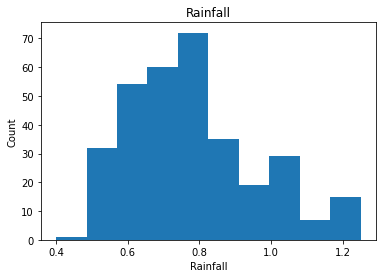

Flyers
lower bound: -15.0
upper_bound: 97.0 



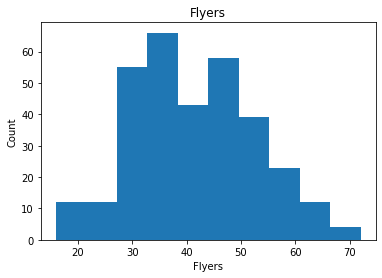

Sales
lower bound: -2.0
upper_bound: 54.0 



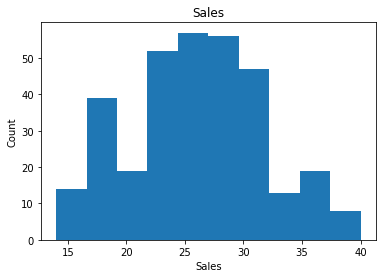

In [43]:
cols = ['Temperature', 'Rainfall', 'Flyers', 'Sales']

for col in df.describe().columns:
    
    print(col)
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier = 3)
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")
    plt.hist(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [44]:
df.shape

(324, 6)

- temp: better with multiplier of 1.5
- rainfall: better with multiplier of 3, though I would leave all data points
- flyers: would use 0 for lower bound, keep everything else
- price: no outliers to remove
- sales: would use multiplier of 3 for upper bound, not remove lowers


## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [17]:
normal = ['Temperature','Rainfall','Flyers']


In [18]:
def sigma_outliers(df_col, sigma=2):
    
    # Calculate the z-score
    zscore = abs((df_col.mean()) / (df_col.std()))

    # Calculate upper bound
    upper_bound = (zscore * sigma) + df_col.mean()
    
    # Calculate upper bound
    lower_bound = df_col.mean() - (zscore * sigma)
    
    return upper_bound, lower_bound

In [19]:
for col in normal:
    
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col])
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")

Temperature
lower bound: 52.8569709006796
upper_bound: 71.61586860549328 

Rainfall
lower bound: -8.057542559838467
upper_bound: 9.61075243638168 

Flyers
lower bound: 33.92462229724215
upper_bound: 48.45809375214057 



## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [20]:
for col in normal:
    
    print(col)
    upper_bound, lower_bound = sigma_outliers(df[col], sigma=3)
    print("lower bound:",lower_bound)
    print("upper_bound:",upper_bound,"\n")

Temperature
lower bound: 48.16724647447617
upper_bound: 76.3055930316967 

Rainfall
lower bound: -12.474616308893504
upper_bound: 14.027826185436718 

Flyers
lower bound: 30.291254433517544
upper_bound: 52.09146161586518 



In [45]:
def plot_ranges(df_col):
    '''
    Plots bounds of outliers rules for IQR and Sigma
    '''
    # setting figure size
    plt.figure(figsize=(15,7))

    # adding title to whole plot
    plt.title(f"Histogram of {df_col}", fontsize=20)
    
    # adding line for x axis
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
    
    # plotting histogram of column, with parameters for color, transparency, and histogram type
    sns.histplot(df[df_col], color="grey", alpha=.15, element="step")

    # calculating upper and lower bounds of sigma = 2 outliers
    upper_bound, lower_bound = sigma_outliers(df[df_col], sigma=2)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="lightcoral", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="lightcoral", linewidth=3, alpha=.75)

    # calculating upper and lower bounds of sigma = 3 outliers
    upper_bound, lower_bound = sigma_outliers(df[df_col], sigma=3)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="seagreen", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="seagreen", linewidth=3, alpha=.75)

    # calculating upper and lower bounds of IQR * 1.5 rule
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col])

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="c", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="c", linewidth=3, alpha=.75)

    # calculating upper and lower bounds of IQR * 3 rule
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col], multiplier=3)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="orange", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="orange", linewidth=3, alpha=.75)

    # adding legend with labels
    plt.legend(["","2 sigma","","3 sigma","","IQR 1.5","","IQR 3",""], title='Outlier Rule', bbox_to_anchor=(1.05, 1), loc='upper left')

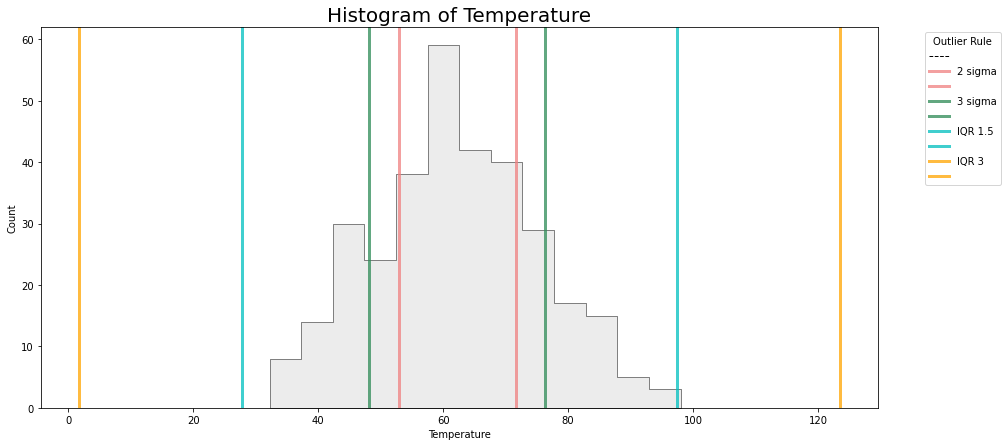

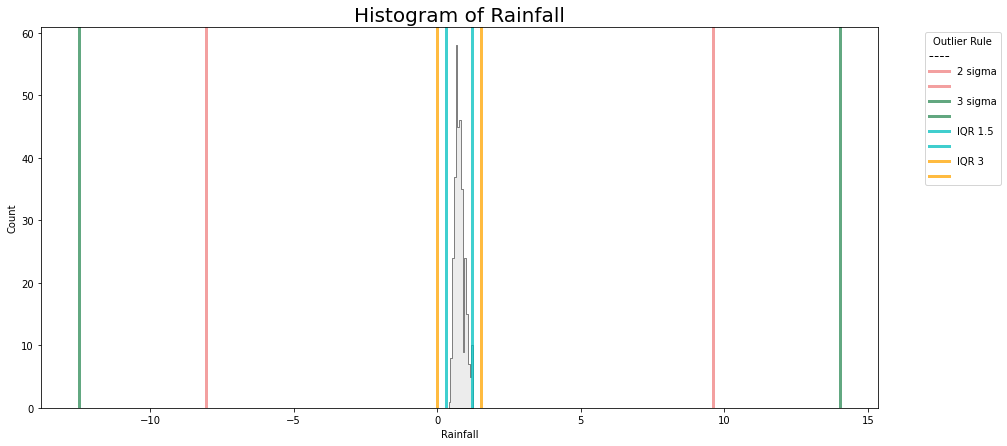

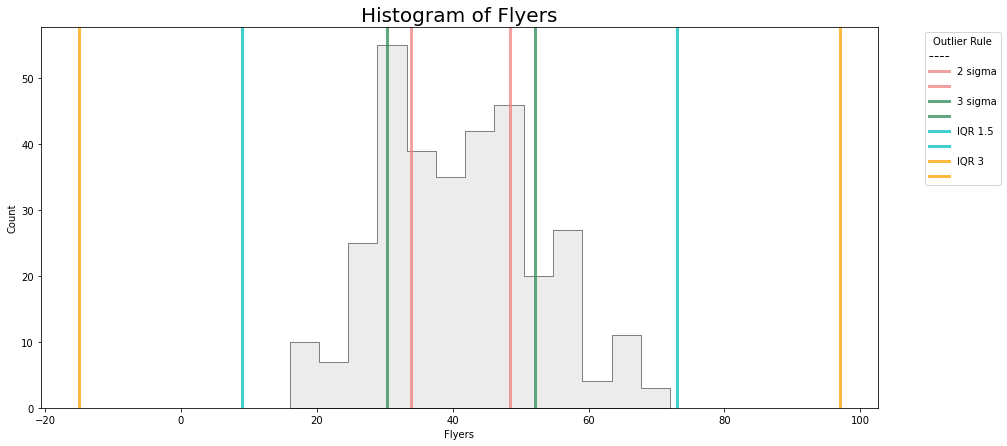

In [46]:
for col in ['Temperature','Rainfall','Flyers']:
    plot_ranges(col)

In [47]:
def plot_ranges_IQR(df_col):
    '''
    Plots bounds of outliers rules for 1.5, 3, 4.5, and 6
    '''
    # setting figure size
    plt.figure(figsize=(15,7))

    # adding title to whole plot
    plt.title(f"Histogram of {df_col}", fontsize=20)
        
    # adding line for x axis
    plt.axhline(0, color="black", linestyle="--", linewidth=1)
        
    # plotting histogram of column, with parameters for color, transparency, and histogram type
    sns.histplot(df[df_col], color="grey", alpha=.15, element="step")

    # calculating upper and lower bounds of IQR * 1.5 outliers
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col])

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="lightcoral", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="lightcoral", linewidth=3, alpha=.75)

    # calculating upper and lower bounds of IQR * 3 outliers
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col], multiplier=3)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="seagreen", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="seagreen", linewidth=3, alpha=.75)
    
    # calculating upper and lower bounds of IQR * 4.5 outliers
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col], multiplier=4.5)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="c", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="c", linewidth=3, alpha=.75)

    # calculating upper and lower bounds of IQR * 6 outliers
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[df_col], multiplier=6)

    # plotting reference lines of the bounds
    plt.axvline(lower_bound, color="orange", linewidth=3, alpha=.75)
    plt.axvline(upper_bound, color="orange", linewidth=3, alpha=.75)

    # adding legend with labels
    plt.legend(["","IQR 1.5","","IQR 3","","IQR 4.5","","IQR 6",""],title='Outlier Rule', bbox_to_anchor=(1.05, 1), loc='upper left')

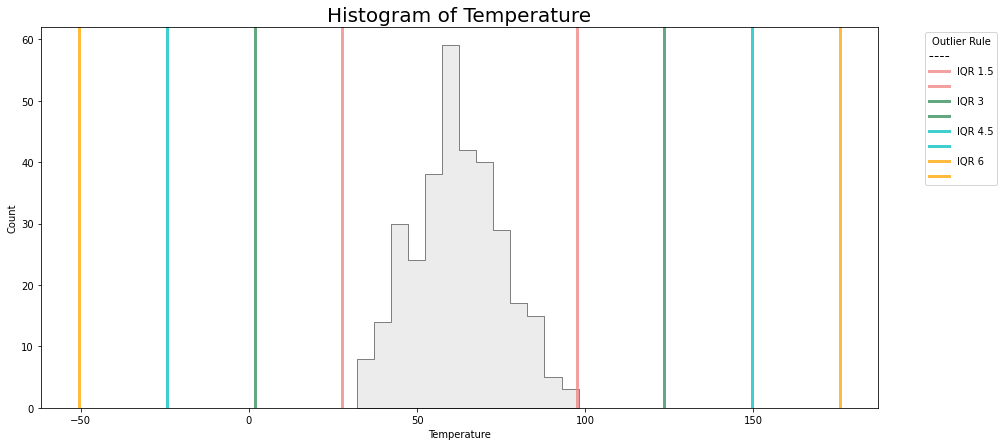

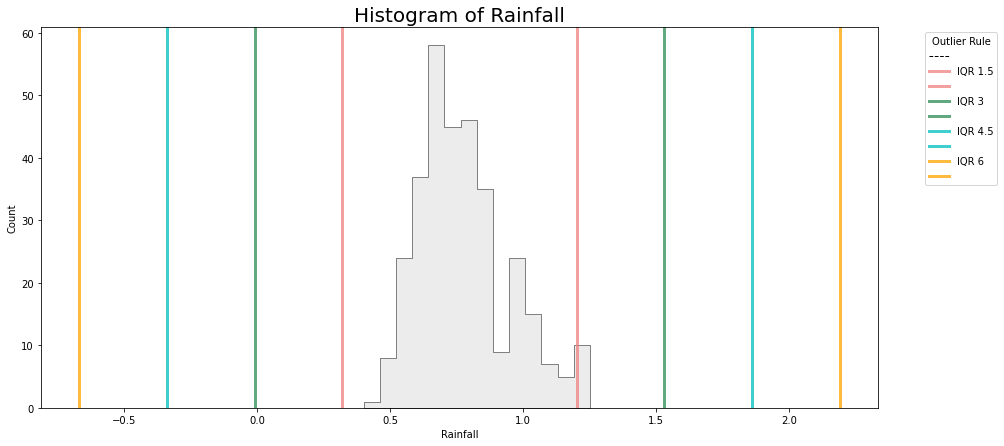

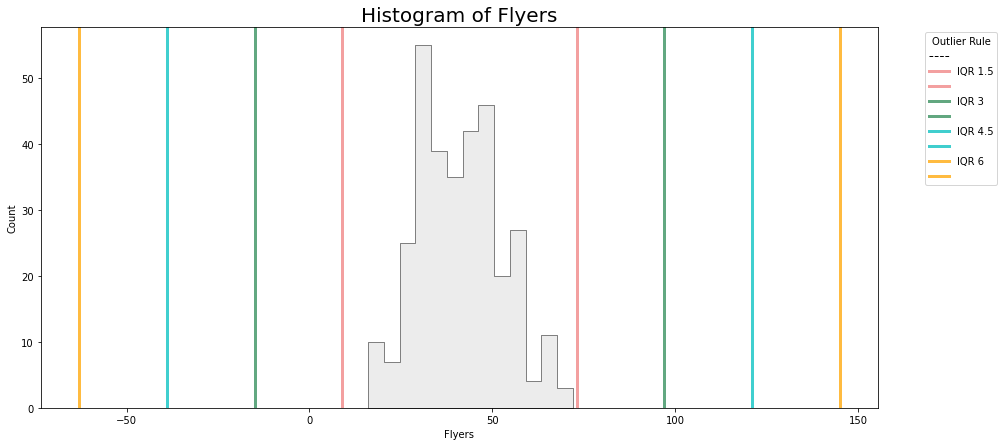

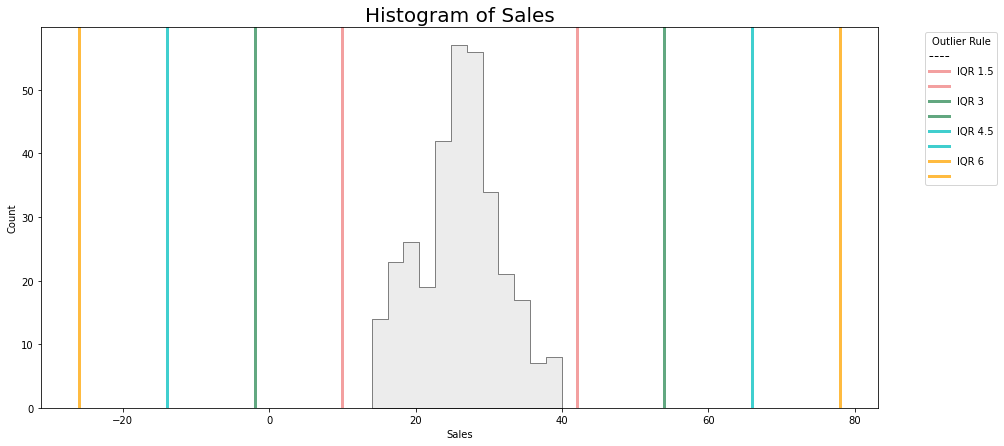

In [48]:
for col in df.describe().columns:
    plot_ranges_IQR(col)
